
<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
Digital Image Processing <br>
<font color=2565AE size=5>
Department Of Mathematical Sciences <br>
Spring 2025<br>
<font color=3C99D size=5>
Assignment 4 <br>
</div>


---



### Full Name : Raya Namazi
### Student Number : 402100561
___

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd "/content/drive/MyDrive/DIP/HW4_practical"

/content/drive/MyDrive/DIP/HW4_practical


In [ ]:
ls

coins.png  Hw4_practical.pdf  leaf.jpg  Leaves/  noisy_image.png  Q2.png


# Dilation and Erosion

In [ ]:
def dilate(image, structuring_element):
##################################################
################### YOUR CODES ###################
    se_height, se_width = structuring_element.shape
    pad_h = se_height // 2
    pad_w = se_width // 2
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    out = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded[i:i+se_height, j:j+se_width]

            if np.any(region[structuring_element == 1]):
                out[i, j] = 1
    return out


##################################################

In [ ]:
def erode(image, structuring_element):
##################################################
################### YOUR CODES ###################

    se_height, se_width = structuring_element.shape
    pad_h = se_height // 2
    pad_w = se_width // 2
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    out = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded[i:i+se_height, j:j+se_width]

            if np.all(region[structuring_element == 1]):
                out[i, j] = 1
    return out


##################################################

## Noise Reduction

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
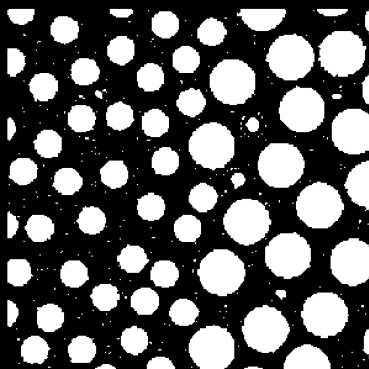

In [ ]:
path = "noisy_image.png"
noisy_image = cv2.imread(path, 0)
noisy_image

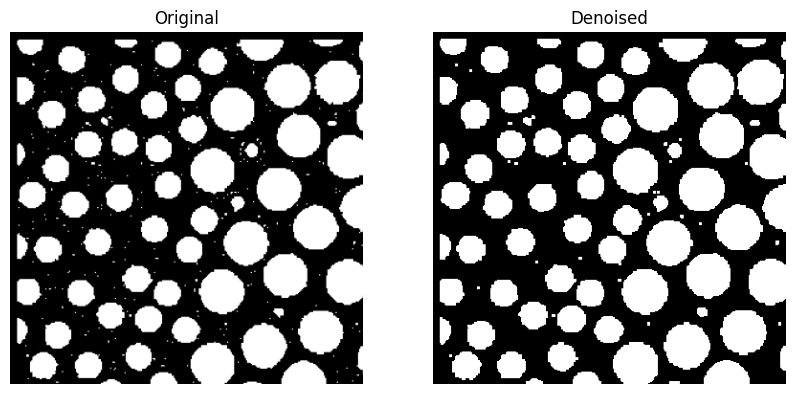

In [ ]:
structuring_element = np.ones((3, 3))

eroded = erode(noisy_image, structuring_element)
denoised = dilate(eroded, structuring_element)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Denoised')
plt.imshow(denoised, cmap='gray')
plt.axis('off')
plt.show()

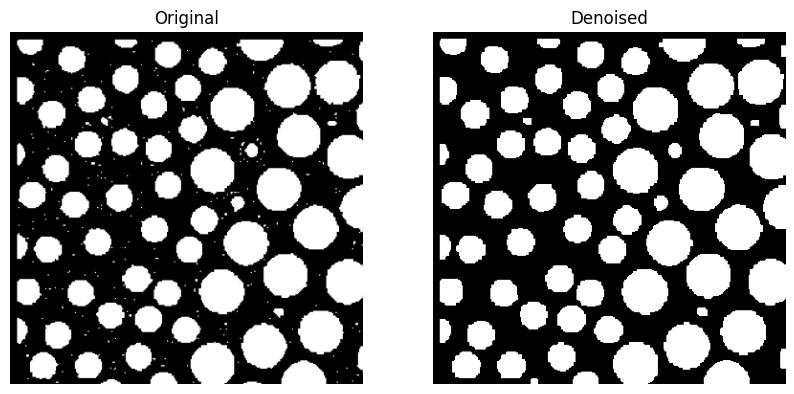

In [ ]:
structuring_element = np.ones((5, 5))

eroded = erode(noisy_image, structuring_element)
denoised = dilate(eroded, structuring_element)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Denoised')
plt.imshow(denoised, cmap='gray')
plt.axis('off')
plt.show()

## Parallel Vertical Lines

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
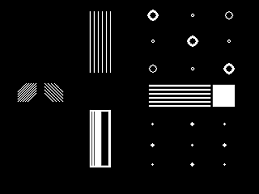

In [ ]:
image = cv2.imread("Q2.png")
image

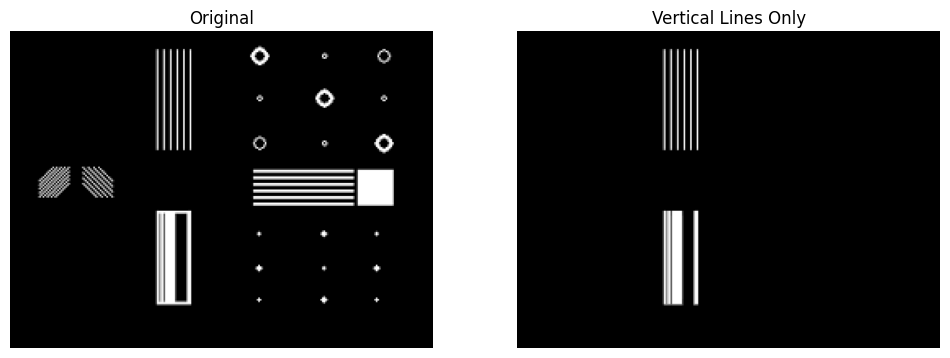

In [ ]:
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 25))
vertical_lines = cv2.morphologyEx(image, cv2.MORPH_OPEN, vertical_kernel)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Vertical Lines Only')
plt.imshow(vertical_lines, cmap='gray')
plt.axis('off')
plt.show()

## Parallel Horizontal Lines

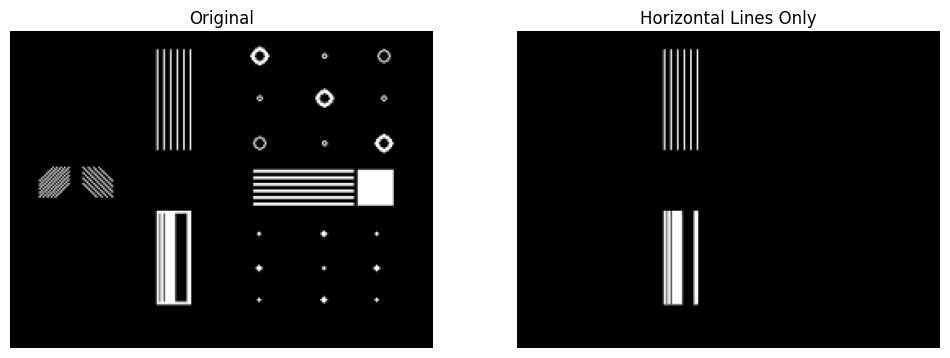

In [ ]:
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 1))

horizontal_lines = cv2.morphologyEx(image, cv2.MORPH_OPEN, horizontal_kernel)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Horizontal Lines Only')
plt.imshow(vertical_lines, cmap='gray')
plt.axis('off')
plt.show()

## Edge Detecting

array([[226, 226, 226, ..., 224, 224, 224],
       [226, 226, 226, ..., 224, 224, 224],
       [226, 226, 226, ..., 224, 224, 224],
       ...,
       [227, 227, 227, ..., 207, 207, 207],
       [227, 227, 227, ..., 207, 207, 207],
       [227, 227, 227, ..., 207, 207, 207]], dtype=uint8)
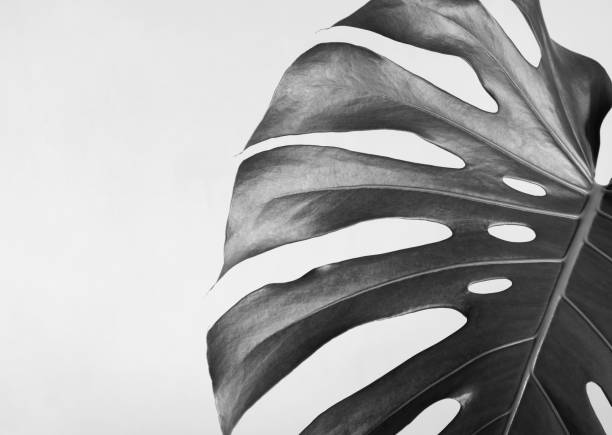

In [ ]:
leaf_image = cv2.imread("leaf.jpg", cv2.IMREAD_GRAYSCALE)
leaf_image

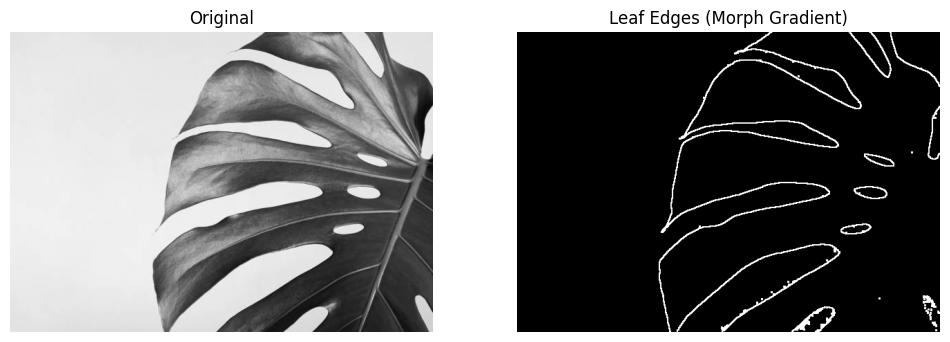

In [ ]:
binary_leaf = cv2.threshold(leaf_image, 215, 255, cv2.THRESH_BINARY)[1]

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

eroded_leaf = cv2.erode(binary_leaf, kernel)
dilated_leaf = cv2.dilate(binary_leaf, kernel)
morph_gradient = cv2.subtract(dilated_leaf, eroded_leaf)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(leaf_image, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Leaf Edges (Morph Gradient)')
plt.imshow(morph_gradient, cmap='gray')
plt.axis('off')
plt.show()

# Counting Coins

array([[[198, 198, 192],
        [197, 197, 191],
        [197, 197, 191],
        ...,
        [170, 171, 162],
        [170, 171, 162],
        [169, 170, 161]],

       [[197, 197, 191],
        [197, 197, 191],
        [196, 196, 190],
        ...,
        [170, 171, 162],
        [170, 171, 162],
        [169, 170, 161]],

       [[196, 196, 190],
        [196, 196, 190],
        [195, 195, 189],
        ...,
        [170, 171, 162],
        [170, 171, 162],
        [169, 170, 161]],

       ...,

       [[174, 170, 165],
        [174, 170, 165],
        [174, 170, 165],
        ...,
        [155, 147, 140],
        [155, 147, 140],
        [154, 146, 139]],

       [[172, 169, 164],
        [172, 169, 164],
        [172, 169, 164],
        ...,
        [153, 147, 140],
        [153, 147, 140],
        [152, 146, 139]],

       [[183, 184, 175],
        [183, 184, 175],
        [183, 184, 175],
        ...,
        [181, 178, 170],
        [181, 178, 170],
        [180, 177, 169]]], dtype=uint8)
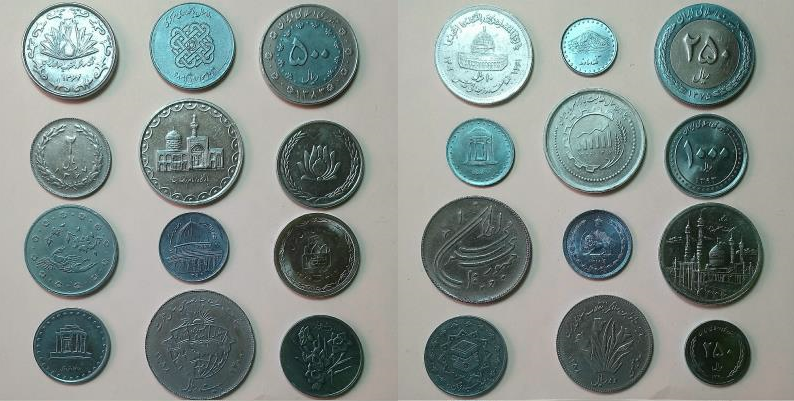

In [ ]:
path = "coins.png"
coins = cv2.imread(path)
coins

number of small coins: 7


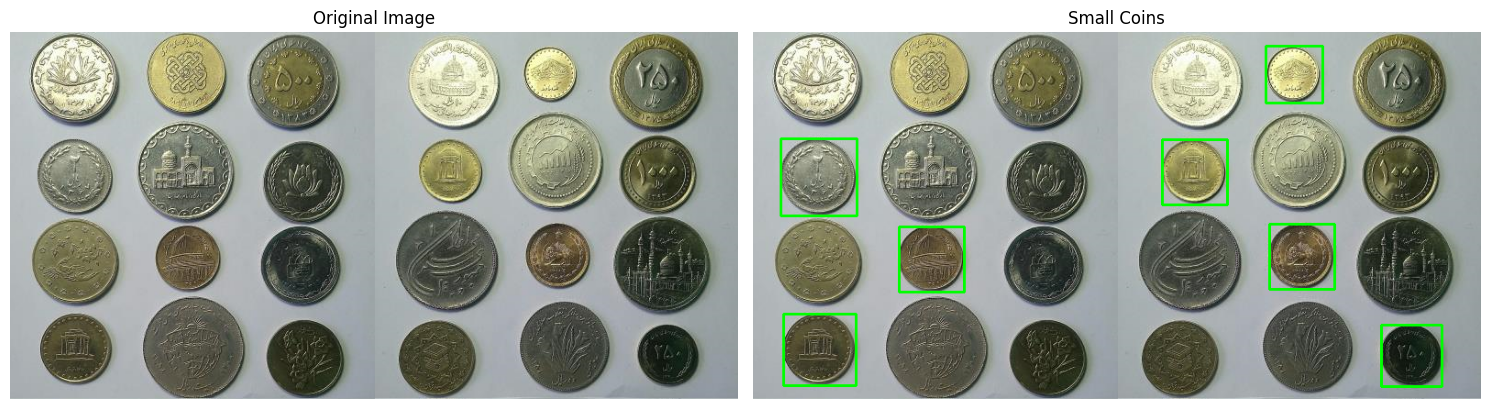

In [ ]:
gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (11, 11), 0)

binary = cv2.adaptiveThreshold(blurred, 255,
                             cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                             cv2.THRESH_BINARY_INV, 11, 2)

kernel = np.ones((3,3), np.uint8)
cleaned = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=2)
cleaned = cv2.morphologyEx(cleaned, cv2.MORPH_OPEN, kernel, iterations=1)

contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

output = coins.copy()
small_coin_count = 0

for i, cnt in enumerate(contours):
    area = cv2.contourArea(cnt)

    perimeter = cv2.arcLength(cnt, True)
    if perimeter == 0:
        continue

    circularity = 4 * np.pi * area / (perimeter ** 2)

    if 500 < area < 5350 and 0.7 < circularity < 1.3:
        small_coin_count += 1
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)

print(f"number of small coins: {small_coin_count}")

plt.figure(figsize=(15, 10))
plt.subplot(121), plt.imshow(cv2.cvtColor(coins, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.axis('off')

plt.subplot(122), plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title('Small Coins'), plt.axis('off')

plt.tight_layout()
plt.show()

# Shape Descriptors

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

Load the Images

Autumn Leaf Images: ['autumn leaf (1).jpg', 'autumn leaf (2).png', 'autumn leaf (3).png']
Banana Leaf Images: ['banana leaf (1).jpg', 'banana leaf (2).png', 'banana leaf (3).png']


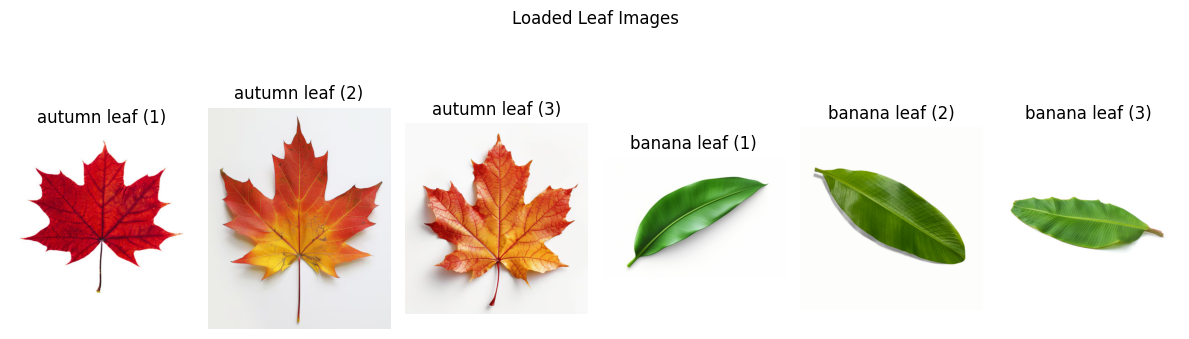

In [ ]:
folder_path = 'Leaves'
image_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')])

autumn_files = [f for f in image_files if 'autumn' in f.lower()]
banana_files = [f for f in image_files if 'banana' in f.lower()]

print("Autumn Leaf Images:", autumn_files)
print("Banana Leaf Images:", banana_files)

plt.figure(figsize=(12, 4))
for i, file in enumerate(image_files):
    img = cv2.imread(os.path.join(folder_path, file))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, len(image_files), i + 1)
    plt.imshow(img_rgb)
    plt.title(file.split('.')[0])
    plt.axis('off')
plt.suptitle('Loaded Leaf Images')
plt.tight_layout()
plt.show()

Extract Feature Vector for each Image

In [ ]:
features = []
labels = []

for filename in image_files:
    path = os.path.join(folder_path, filename)
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    if np.sum(binary == 255) > np.sum(binary == 0):
        binary = cv2.bitwise_not(binary)

    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnt = max(contours, key=cv2.contourArea)

    area = cv2.contourArea(cnt)
    x, y, w, h = cv2.boundingRect(cnt)
    hull = cv2.convexHull(cnt)
    hull_area = cv2.contourArea(hull)

    extent = area / (w * h)
    aspect_ratio = w / h
    solidity = area / hull_area if hull_area != 0 else 0

    features.append([extent, aspect_ratio, solidity, area])

    if 'autumn' in filename.lower():
        labels.append('Autumn')
    elif 'banana' in filename.lower():
        labels.append('Banana')
    else:
        labels.append('Unknown')

features = np.array(features)
labels = np.array(labels)

for i, f in enumerate(features):
    print(f"{image_files[i]} -> Extent: {f[0]:.3f}, Aspect Ratio: {f[1]:.3f}, Solidity: {f[2]:.3f}, Area: {f[3]:.0f}")

autumn leaf (1).jpg -> Extent: 0.420, Aspect Ratio: 1.039, Solidity: 0.612, Area: 41152
autumn leaf (2).png -> Extent: 0.384, Aspect Ratio: 0.782, Solidity: 0.587, Area: 73494
autumn leaf (3).png -> Extent: 0.467, Aspect Ratio: 0.895, Solidity: 0.662, Area: 114222
banana leaf (1).jpg -> Extent: 0.416, Aspect Ratio: 1.558, Solidity: 0.960, Area: 62231
banana leaf (2).png -> Extent: 0.528, Aspect Ratio: 1.559, Solidity: 0.968, Area: 212330
banana leaf (3).png -> Extent: 0.615, Aspect Ratio: 2.896, Solidity: 0.933, Area: 148760


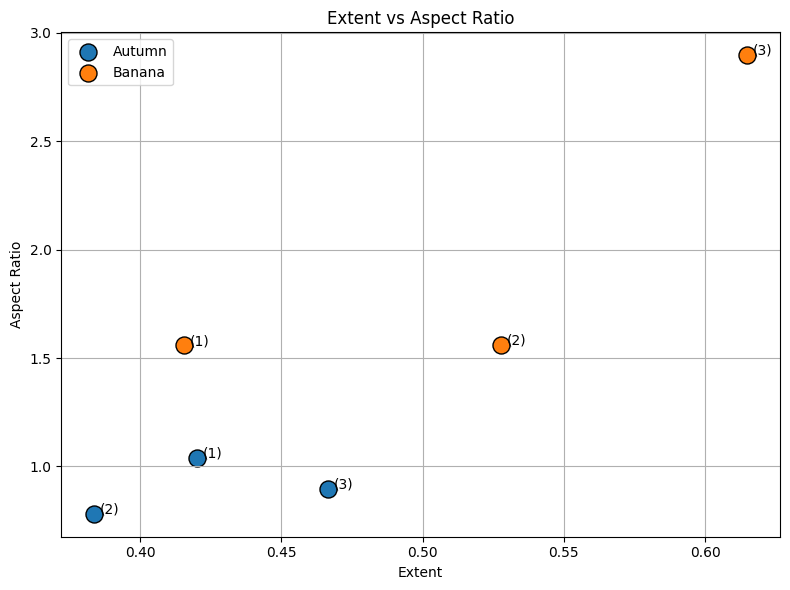

In [ ]:
features = np.array(features)
labels = np.array(labels)

x_index = 0
y_index = 1

feature_names = ['Extent', 'Aspect Ratio', 'Solidity', 'Area']

plt.figure(figsize=(8, 6))

for label in np.unique(labels):
    idx = labels == label
    plt.scatter(
        features[idx, x_index],
        features[idx, y_index],
        label=label,
        s=150,
        edgecolor='black'
    )

for i, filename in enumerate(image_files):
    x = features[i, x_index]
    y = features[i, y_index]
    short_name = filename.split('.')[0].split(' ')[-1]
    plt.text(x + 0.002, y + 0.002, short_name, fontsize=10)

plt.xlabel(feature_names[x_index])
plt.ylabel(feature_names[y_index])
plt.title(f'{feature_names[x_index]} vs {feature_names[y_index]}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Classify by a Simple Model

In [ ]:
x_index = 0
y_index = 1

X = features[:, [x_index, y_index]]
label_map = {'Banana': 0, 'Autumn': 1}
y = np.array([label_map[label] for label in labels])

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(), max_iter=6000, random_state=42)
mlp.fit(X, y)
y_pred = mlp.predict(X)
accuracy = accuracy_score(y, y_pred)

print("Accuracy:", accuracy)

Accuracy: 1.0


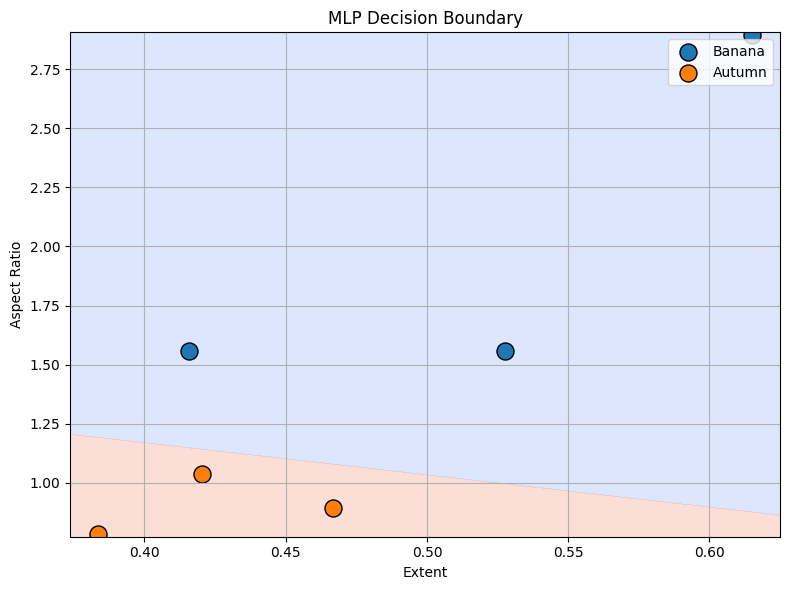

In [ ]:
# ---- Plotting ----
feature_names = ['Extent', 'Aspect Ratio', 'Solidity', 'Area']

x_min, x_max = X[:, 0].min() - 0.01, X[:, 0].max() + 0.01
y_min, y_max = X[:, 1].min() - 0.01, X[:, 1].max() + 0.01
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)
grid = np.c_[xx.ravel(), yy.ravel()]
Z = mlp.predict(grid).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(-0.5, 2), cmap='coolwarm')

for label_value, label_name in zip([0, 1], ['Banana', 'Autumn']):
    idx = y == label_value
    plt.scatter(X[idx, 0], X[idx, 1], label=label_name, s=150, edgecolor='k')

plt.xlabel(feature_names[x_index])
plt.ylabel(feature_names[y_index])
plt.title(f'MLP Decision Boundary')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

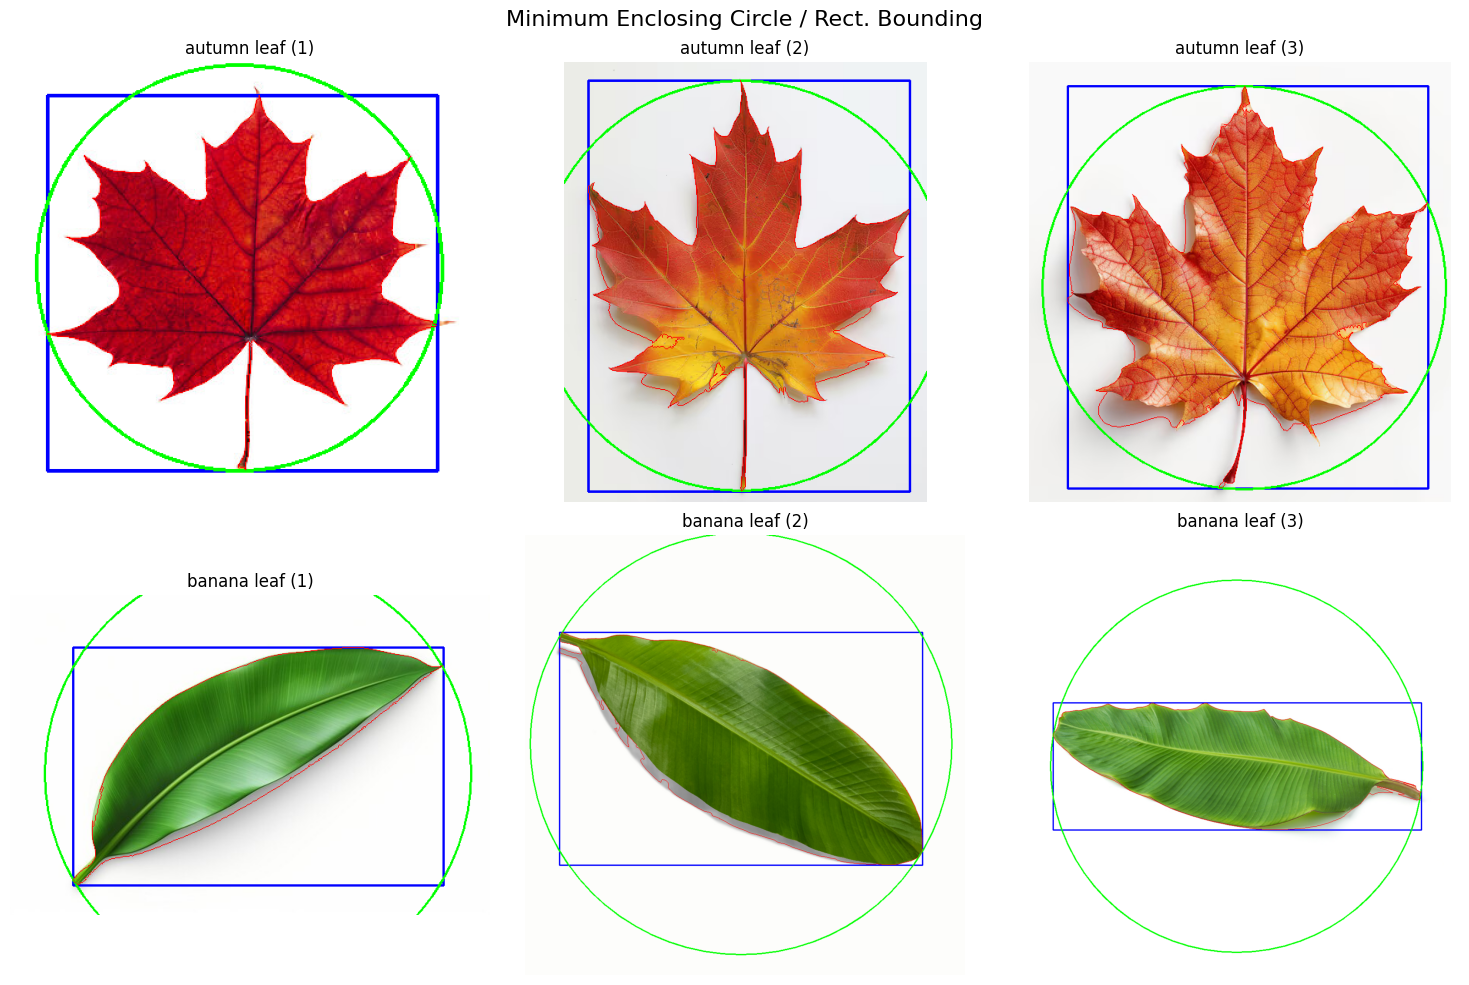

In [ ]:
plt.figure(figsize=(15, 10))

for i, filename in enumerate(image_files):
    path = os.path.join(folder_path, filename)
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    if np.sum(binary == 255) > np.sum(binary == 0):
        binary = cv2.bitwise_not(binary)

    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnt = max(contours, key=cv2.contourArea)

    x, y, w, h = cv2.boundingRect(cnt)
    img_rect = img.copy()
    cv2.rectangle(img_rect, (x, y), (x + w, y + h), (255, 0, 0), 2)

    (cx, cy), radius = cv2.minEnclosingCircle(cnt)
    center = (int(cx), int(cy))
    radius = int(radius)
    cv2.circle(img_rect, center, radius, (0, 255, 0), 2)

    cv2.drawContours(img_rect, [cnt], -1, (0, 0, 255), 1)

    plt.subplot(2, 3, i + 1)
    plt.imshow(cv2.cvtColor(img_rect, cv2.COLOR_BGR2RGB))
    plt.title(filename.split('.')[0])
    plt.axis('off')

plt.suptitle('Minimum Enclosing Circle / Rect. Bounding', fontsize=16)
plt.tight_layout()
plt.show()